Start by importing useful modules

In [74]:
import numpy as np
import matplotlib.pyplot as plt

Setup simulation parameters

In [138]:
ntot=100 # total number of particles
nl0=100 # initial number of particles on the left side of the box
dt=0.001 # this value should be reasonable, but you are free to test larger or smaller values
xbox=1. # when using arbitrary units is a good idea to keep them close to unity
ybox=1. # we start by considering a square box, but you are free to change this parameter as you like

Setup starting configuration

In [112]:
def initial(xbox,ybox,nl0,ntot):
    xpos=np.random.uniform(0.,xbox/2,nl0) # this is numpy array with nl0 elements, corresponding to the x-coordinates of the particles on the left side of the box
    np.append(xpos,np.random.uniform(xbox/2,xbox,ntot-nl0)) # here we add the x-coordinates of the particles in the right side of the box
    ypos=np.random.uniform(0.,ybox,ntot) # this is a numpy array with ntot elements, corresponding to the y-coordinates of the particles. 
    # NOTE: initial positions should be inside the [0,ybox] interval. 
    xvel=np.random.uniform(-1.,1.,ntot) # this is a numpy array with ntot elements, corresponding to the x-component of the particles's velocities. 
    # NOTE: initial velocities are considered to be uniformly distributed inside the [-1.,1.] interval.
    yvel=np.random.uniform(-1.,1.,ntot) # this is a numpy array with ntot elements, corresponding to the x-component of the particles's velocities. 
    # NOTE: initial velocities are considered to be uniformly distributed inside the [-1.,1.] interval.
    return xpos,ypos,xvel,yvel

The following is the function responsible to describe the motion of a single particle during a short timestep

In [113]:
def move(dt,xpos,ypos,xvel,yvel,xbox,ybox):
    """
    This function describes the motion of a single particle subject to no interactions but elastic reflections from the box walls.
    The particle's coordinates will change according to a constant velocity motion. 
    If the position of the particle falls outside of the box walls, the particle's velocity changes sign (reflection).
    Input arguments:
        dt: timestep; xpos/ypos: particle's coordinate along xy; xvel/yvel: x/y-component of particle's velocity; xbox/ybox: lenghts of box.
    Output results:
        updated x and y components of particle's position and velocity
    """
    xpos += dt*xvel
    ypos += dt*yvel
    xvel *= 1-2*((xpos > xbox)+(xpos < 0.0))
    yvel *= 1-2*((ypos > ybox)+(ypos < 0.0))
    return xpos, ypos, xvel, yvel

In [114]:
def countleft(xpos,xbox):
    return np.count_nonzero(xpos<xbox/2)

Define the function that performs a single step of the animation

In [134]:
nsamples=100
nsteps=10000
nl=np.zeros(nsteps)
nr=np.zeros(nsteps)
for j in range(nsamples): 
    xpos,ypos,xvel,yvel=initial(xbox,ybox,nl0,ntot)
    for i in range(nsteps):
        ntmp=countleft(xpos,xbox)
        nl[i]+=ntmp
        nr[i]+=ntot-ntmp
        xpos, ypos, xvel, yvel = move(dt,xpos,ypos,xvel,yvel,xbox,ybox) # move particles
nl/=nsamples
nr/=nsamples

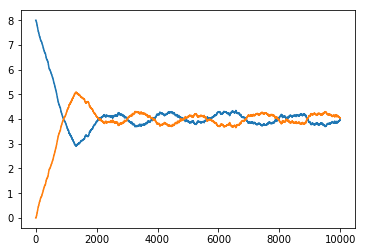

In [135]:
plt.plot(nl)
plt.plot(nr)
plt.show()

In [136]:
frequency=np.count_nonzero(nl==ntot)/nsteps
print(frequency,1/2**8)

0.0001 0.00390625


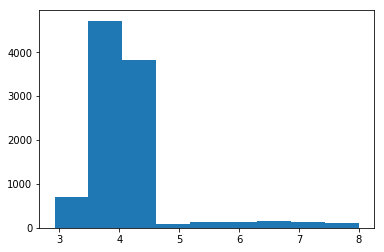

In [137]:
plt.hist(nl,bins=9)
plt.show()